In [1]:
import pandas as pd

tweets = pd.read_csv('tweets.csv', encoding = "utf-8")

tweets.head()

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
2,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
3,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology


In [2]:
print('Data size:', tweets.shape)

Data size: (26747, 2)


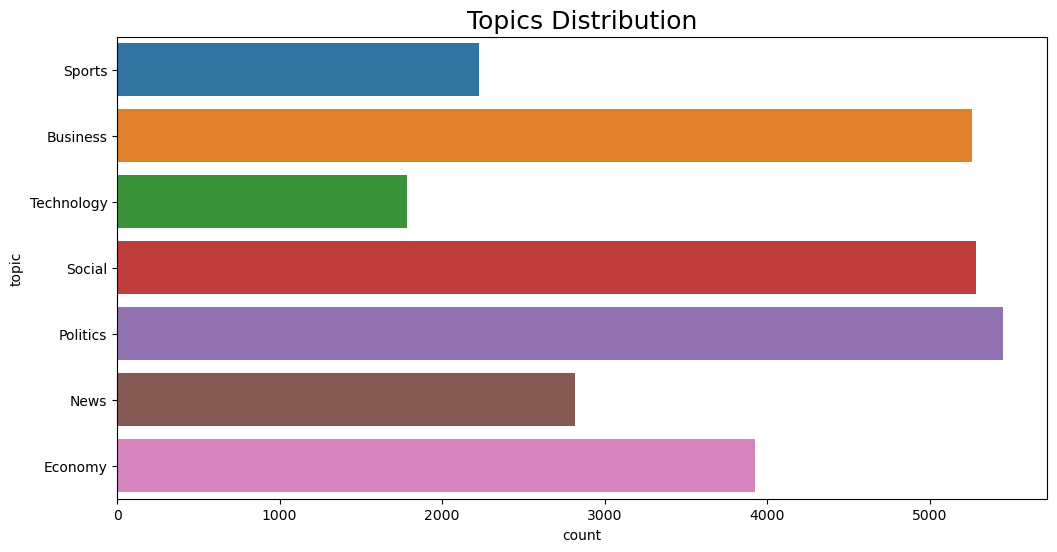

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic')
plt.title('Topics Distribution', fontsize=18)

plt.show()

In [4]:
import string
import re
import nltk

nltk.download('punkt')

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from snowballstemmer import stemmer

def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def clean_tweet(tweet):
      
    emoj = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF" 
            u"\U00002500-\U00002BEF"  
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)
    
    tweet =  re.sub(emoj, '', tweet)

    
    tweet = re.sub("@[^\s]+","",tweet)
    
    tweet = re.sub("RT","",tweet)
    
    tweet = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweet)
    
    tweet = re.sub(r'[0-9]+', '', tweet)  
    
    tweet = remove_chars(tweet, "٠١٢٣٤٥٦٧٨٩")
 
    
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    
    english_punctuations = string.punctuation
    
    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)
     
    tweet = remove_repeating_char(tweet)
    
    tweet = tweet.replace('\n', ' ')  
      
    tweet = tweet.strip(' ')  
    return tweet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eyad3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyad3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def tokenizingText(text):
    tokens_list = word_tokenize(text)
    return tokens_list

def filteringText(tokens_list):
    
    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered

def stemmingText(tokens_list): 
    
    ar_stemmer = stemmer("arabic")
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list
    
def toSentence(words_list):  
    sentence = ' '.join(word for word in words_list)
    return sentence

In [6]:
def process_tweet(tweet):
    
    tweet=clean_tweet(tweet)
    
    tokens_list=tokenizingText(tweet)
    
    tokens_list=filteringText(tokens_list)
    
    tokens_list=stemmingText(tokens_list)
    return tokens_list

In [7]:
text= "أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  "

processed_tweet= process_tweet(text)
print(processed_tweet)

['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [8]:
tweets['tweet'] = tweets['tweet'].apply(process_tweet)

tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports
2,"[عذيب, سعر, حال]",Business
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology
...,...,...
26742,"[خير, سحب, مبلغ, الاف, ولم, تخرج, صراف, طريق, ...",Business
26743,"[صرف, ادو, ياخذ, اسبوع, لاسبوع, والادو, باق, ا...",Business
26744,"[جيت, قدم, لاغ, يوم, رقع, اسعار, تطبيق, مشكل, ...",Business
26745,"[حال, توف, مريض, مستشفي, حق, مطالب, ماليه, نرج...",Business


In [9]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

tweets, Y = oversample.fit_resample(tweets, tweets.topic)

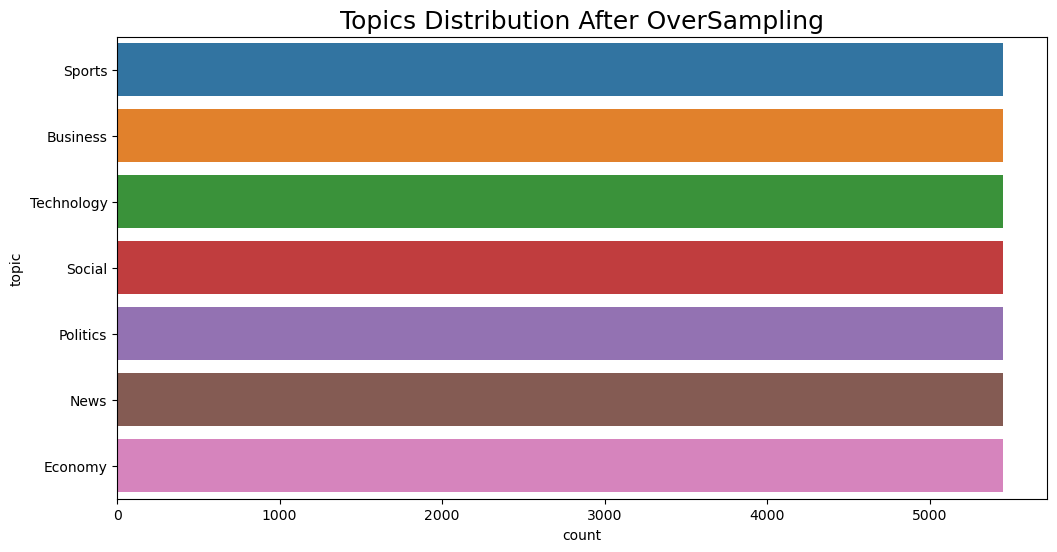

In [10]:
plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic');
plt.title('Topics Distribution After OverSampling', fontsize=18)

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

le_topics = LabelEncoder()
tweets['topic'] = tweets[['topic']].apply(le_topics.fit_transform)

classes = le_topics.classes_

n_classes = len(classes)
print("No. of classes:", n_classes)
print("Classes:", classes)
print("Coding: ", le_topics.transform(classes))

No. of classes: 7
Classes: ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
Coding:  [0 1 2 3 4 5 6]


In [12]:
sentences = tweets['tweet'].apply(toSentence)

sentences

0        حارس عند ضعف نظر مدر يحرص عموم حال حال لاعب هل...
1        كثير متع كان حاضر ملعب قيم الفن عاليه سالمالدو...
2                                             عذيب سعر حال
3        حمدلله شعور يوصف ولن انسي فضل جمهور هلال عل شخ...
4        ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
                               ...                        
38145    فايروس خطير جدا استهدف مستخدم نظام اندرويد قاد...
38146    فايروس خطير جدا استهدف مستخدم نظام اندرويد قاد...
38147    سلام علي ضريب قيمه مضافه صعب تسدد الحل عند تصف...
38148    سهام قول تابي ترد تصيب جرح مستشف فكن طيب قول م...
38149    ان اغلب حب شكل جديد لصفح تغريد تويتر شرح تفعل ...
Name: tweet, Length: 38150, dtype: object

In [13]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sentences)
num_words = len(tokenizer.word_counts)
print("Number of words:", num_words)

Number of words: 21984


In [14]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words )

tokenizer.fit_on_texts(sentences)

X = tokenizer.texts_to_sequences(sentences)

In [15]:
print(X[0])
print(X[1])

[2795, 48, 1718, 227, 1467, 6279, 2796, 170, 170, 665, 2, 4533, 4534, 170]
[279, 1942, 244, 3877, 2920, 192, 301, 522, 1996, 7456, 161]


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = pad_sequences(X, maxlen=max_len)
print(X[0])
print(X[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 2795   48 1718  227 1467 6279
 2796  170  170  665    2 4533 4534  170]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  279 1942  244
 3877 2920  192  301  522 1996 7456  161]


In [18]:
tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",5
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",5
2,"[عذيب, سعر, حال]",0
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",5
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",6
...,...,...
38145,"[فايروس, خطير, جدا, استهدف, مستخدم, نظام, اندر...",6
38146,"[فايروس, خطير, جدا, استهدف, مستخدم, نظام, اندر...",6
38147,"[سلام, علي, ضريب, قيمه, مضافه, صعب, تسدد, الحل...",6
38148,"[سهام, قول, تابي, ترد, تصيب, جرح, مستشف, فكن, ...",6


In [17]:
y = tweets['topic']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [20]:
from keras.models import Sequential

from keras.layers import Embedding, Dense, LSTM

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2

model = Sequential()

model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_len))

model.add(LSTM(units = hidden_unit, dropout=dropout_rate))

model.add(Dense(units = len(classes), activation = 'softmax'))

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [22]:
history = model.fit(X_train, y_train,
                             epochs=10, batch_size=32,
                             validation_data=(X_test, y_test))

Epoch 1/10
895/895 [==============================] - 14s 13ms/step - loss: 0.8924 - accuracy: 0.7162 - val_loss: 0.4814 - val_accuracy: 0.8632
Epoch 2/10
895/895 [==============================] - 11s 12ms/step - loss: 0.3326 - accuracy: 0.9031 - val_loss: 0.3490 - val_accuracy: 0.8945
Epoch 3/10
895/895 [==============================] - 11s 12ms/step - loss: 0.1917 - accuracy: 0.9438 - val_loss: 0.3186 - val_accuracy: 0.9088
Epoch 4/10
895/895 [==============================] - 11s 13ms/step - loss: 0.1256 - accuracy: 0.9632 - val_loss: 0.3240 - val_accuracy: 0.9115
Epoch 5/10
895/895 [==============================] - 12s 13ms/step - loss: 0.0922 - accuracy: 0.9738 - val_loss: 0.3401 - val_accuracy: 0.9108
Epoch 6/10
895/895 [==============================] - 12s 13ms/step - loss: 0.0733 - accuracy: 0.9783 - val_loss: 0.3442 - val_accuracy: 0.9147
Epoch 7/10
895/895 [==============================] - 12s 14ms/step - loss: 0.0611 - accuracy: 0.9822 - val_loss: 0.3708 - val_accuracy:

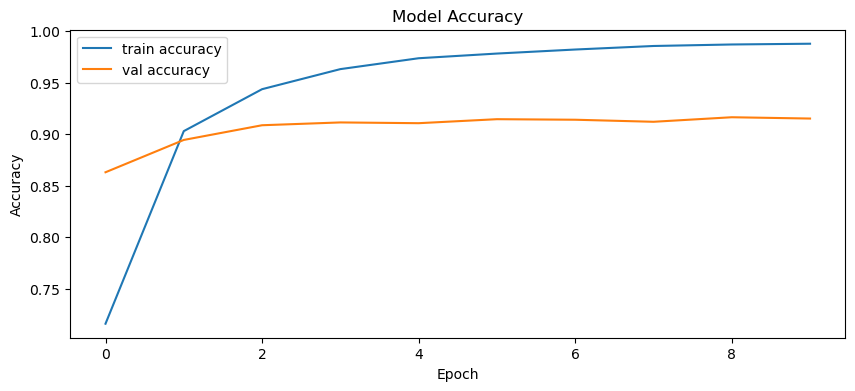

In [23]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')

ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

In [24]:
model.save('perosn_classification_model.keras')

import pickle
tokenizer_path = 'perosn_classification_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [25]:
import numpy as np

def classify_tweet(tweet, model, tokenizer, max_len=50):
    
    seq = tokenizer.texts_to_sequences([tweet])
    
    pseq = pad_sequences(seq, maxlen=max_len)
    
    predections = model.predict(pseq)
    
    pred=np.argmax(predections)
    return pred

In [26]:
from keras.models import load_model
import pickle
classes= ['Business', 'Economy', 'News', 'Politics', 'Social', 'Sports', 'Technology']

def classify_person(person_name,model_path, tokenizer_path, person_path):
    
    model = load_model(model_path)
    
    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)
    
    df = pd.read_csv(person_path)
    
    classes_count=dict()
    
    for i in range(len(classes)):
        key=classes[i]
        classes_count[key]=0

    for _, row in df.iterrows():
        tweet=row['tweet']
        
        processed_tweet=process_tweet(tweet)
        
        code= classify_tweet(processed_tweet, model, tokenizer)
        
        topic=classes[code]
        
        classes_count[topic]=classes_count[topic]+1
 

    x = classes_count.keys()
    y = classes_count.values()

    import matplotlib.pyplot as plt
    # pie
    plt.figure(figsize=(5,5))
    plt.title(person_name, fontdict = {'fontsize':20})
    plt.pie(y, labels = x,autopct='%1.1f%%')
    plt.show()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


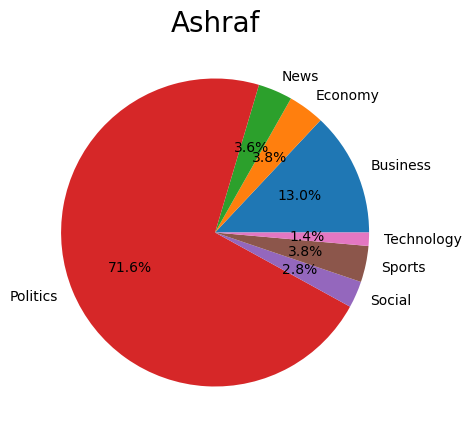

In [27]:
classify_person("Ashraf", 'perosn_classification_model.keras',
                'perosn_classification_tokenizer','ashraf.csv')

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


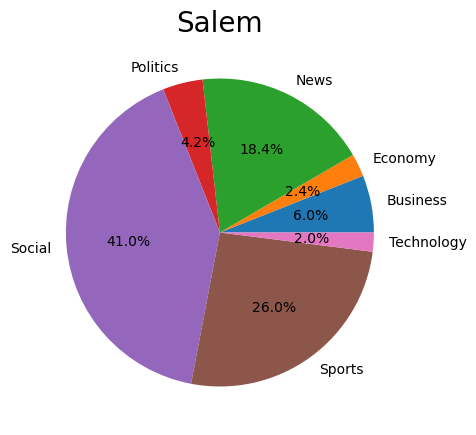

In [28]:
classify_person("Salem",'perosn_classification_model.keras',
                'perosn_classification_tokenizer','salem.csv')